In [3]:
import pandas as pd

In [88]:
data = pd.read_csv('data/dict.txt', sep=" ", header = None)

In [89]:
data.describe()

,0
count,466547
unique,466547
top,2
freq,1


In [90]:
histo = data[0].str.len().value_counts()

In [91]:
histo

9.0     61754
8.0     61019
10.0    54321
7.0     52093
11.0    46411
6.0     39518
12.0    37524
13.0    27924
5.0     22950
14.0    19258
15.0    12148
4.0     11170
16.0     7115
3.0      4710
17.0     3982
18.0     2003
19.0     1053
2.0       636
20.0      506
21.0      238
22.0      102
23.0       49
1.0        27
24.0       18
25.0        7
27.0        3
28.0        2
29.0        2
26.0        2
31.0        1
45.0        1
Name: 0, dtype: int64

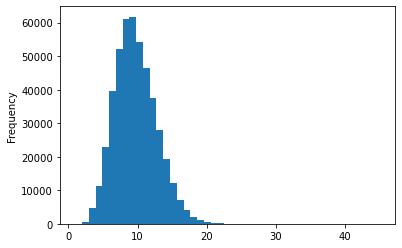

In [92]:
hist = data[0].str.len().plot.hist(bins=45)

In [42]:
data[0] = data[0].astype(str)

In [43]:
data[0]

0                2
1             1080
2               &c
3         10-point
4             10th
            ...   
466545      Zwolle
466546    Zworykin
466547          ZZ
466548         zZt
466549         ZZZ
Name: 0, Length: 466550, dtype: object

In [93]:
dato = data[0].str.len() == 5

In [94]:
dato

0         False
1         False
2         False
3         False
4         False
          ...  
466545    False
466546    False
466547    False
466548    False
466549    False
Name: 0, Length: 466550, dtype: bool

In [95]:
datt = data[dato]

In [97]:
datu = datt[0].apply(lambda x: x.isalpha())

In [98]:
dict5 = datt[datu]

In [100]:
dict5 = dict5[0].str.lower()

In [108]:
dict5.to_csv("dict5l.txt", index=None, header=False)

In [101]:
dict5

91        aahed
98        aalii
101       aalst
102       aalto
104       aamsi
          ...  
466510    zupus
466513    zurek
466527    zwart
466529    zweig
466530    zwick
Name: 0, Length: 21952, dtype: object

In [109]:
dict50 = dict5.str[0]

In [124]:
dict50c = dict50.value_counts()

In [125]:
dict50c

s    2206
a    1698
b    1555
c    1512
t    1264
m    1225
p    1184
d    1128
l    1046
g     965
r     948
f     847
h     844
k     789
e     693
n     647
w     596
o     532
i     473
j     446
u     420
v     404
y     225
z     176
q      93
x      36
Name: 0, dtype: int64

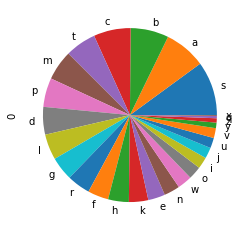

In [128]:
plot = dict50c.plot.pie()

In [130]:
dict51 = dict5.str[1]

In [ ]:
dict51c = dict51.value_counts

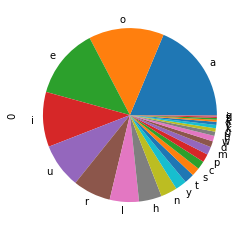

In [132]:
plot = dict51.value_counts().plot.pie()

In [133]:
dict52 = dict5.str[2]

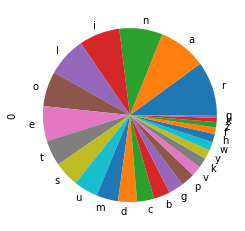

In [134]:
plot = dict52.value_counts().plot.pie()

In [136]:
dict53 = dict5.str[3]

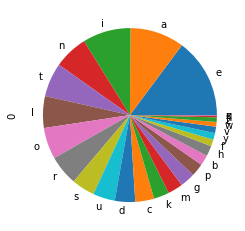

In [137]:
plot = dict53.value_counts().plot.pie()

In [138]:
dict54 = dict5.str[4]

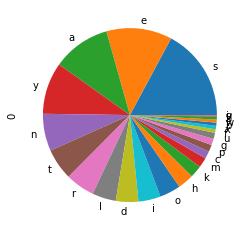

In [139]:
plot = dict54.value_counts().plot.pie()

Most frequent letters in a five-letter word:
- s, a, b, c, t, m, p
- a, o, e, i, u, r, l
- r, a, n, i, l, o, e
- e, a, i, n, t, l, o
- s, e, a, y, n, t, r


w_void is a set that contains letters that should not appear in the final answer.  At the begining, it should be empty.

In [298]:
w_void = {'a', 'b', 'o', 't', 'd', 'y','c','k','h'}

w_poss is a list that contains letters that should be appear somewhere in the final answer.  At the beginning, it should be empty.

In [299]:
w_poss = ['l']

In [300]:
dict5

91        aahed
98        aalii
101       aalst
102       aalto
104       aamsi
          ...  
466510    zupus
466513    zurek
466527    zwart
466529    zweig
466530    zwick
Name: 0, Length: 21952, dtype: object

In [301]:
dict5v = dict5.apply(lambda x: (x[0]=='s') & (x[1]=='l') & (x[2]=='u') & invalidletters(x) & mustletters(x))

In [302]:
dict5v

91        False
98        False
101       False
102       False
104       False
          ...  
466510    False
466513    False
466527    False
466529    False
466530    False
Name: 0, Length: 21952, dtype: bool

In [303]:
dict5vf = dict5[dict5v]

In [304]:
dict5vf

371318    sluer
371319    slues
371321    sluff
371354    slugs
371366    sluig
371416    slump
371424    slums
371428    slung
371441    slurp
371452    slurs
Name: 0, dtype: object

In [268]:
def invalidletters(x):
    if ((x[0] not in w_void) & (x[1] not in w_void) & (x[2] not in w_void) & (x[3] not in w_void) & (x[4] not in w_void)):
        return True
    else:
        return False

In [269]:
def mustletters(x):
    haveit = True;
    for i in range(len(w_poss)):
        haveit = (haveit & (w_poss[i] in x))
    return haveit